Köşe algılama filtreleri 1. ve 2. dereceden olmak üzere ikiye ayrılır.
Temelde resim üzerindekaç kez türev işlemi uygulandığına göre sınıflandırılır.

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

def imshow(input):
    out = torchvision.utils.make_grid(input, nrow=2, padding=1)
    out_np = kornia.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")

In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
img_bgr = cv2.imread("../KendiResmim.jpg", cv2.IMREAD_COLOR)
print(img_bgr.shape)

(1198, 1198, 3)


In [3]:
x_bgr = kornia.image_to_tensor(img_bgr, keepdim=False)
print(x_bgr.shape)

torch.Size([1, 3, 1198, 1198])


In [4]:
x_bgr = kornia.image_to_tensor(img_bgr)
x_rgb = kornia.bgr_to_rgb(x_bgr)
print(x_rgb.shape)

torch.Size([3, 1198, 1198])


Create batch and normalize

torch.Size([4, 1, 1198, 1198])


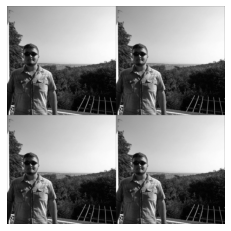

In [5]:
x_rgb = x_rgb.expand(4, -1, -1, -1)
x_rgb = x_rgb.float() / 255.0
x_gray = kornia.rgb_to_grayscale(x_rgb)
print(x_gray.shape)

imshow(x_gray)

1. derece köşe algılama

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


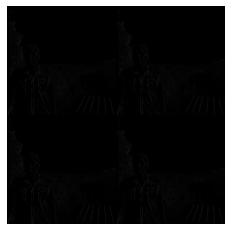

In [6]:
grads = kornia.spatial_gradient(x_gray, order=1)
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]
imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


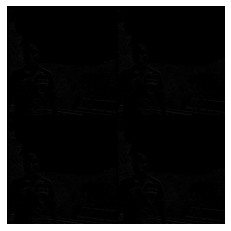

In [7]:
imshow(grads_y)

2. derece köşe algılama

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


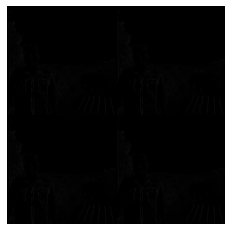

In [8]:
grads = kornia.spatial_gradient(x_gray, order=2)
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]
imshow(grads_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


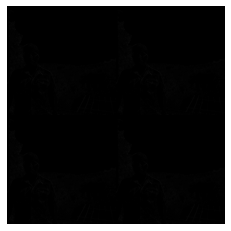

In [9]:
imshow(grads_y)


Sobel yönlü bir filtredir. Kornia her iki yön için hesaplar.

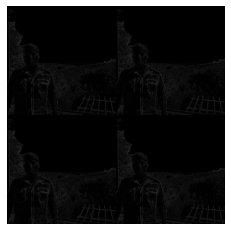

In [10]:
x_sobel: torch.Tensor = kornia.sobel(x_gray)
imshow(x_sobel)

Laplacian filtre

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


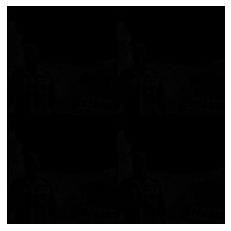

In [11]:
x_laplacian: torch.Tensor = kornia.laplacian(x_gray, kernel_size=5)
imshow(x_laplacian)